In [202]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import h5py


input_dir = os.getcwd()
output_dir = os.getcwd()

print("hi ")
# Get all the files in the directory
files = glob.glob(input_dir + '/**/*.h5', recursive=True)
# remove from files GroundTruth.h5
print(files)
fileGroundTruth = [f for f in files if "GroundTruth" in f][0]
files = [f for f in files if "GroundTruth" not in f]

print(fileGroundTruth)
list_dfs = []
for filename in files:
    # read h5 file
    df = pd.read_hdf(filename)
    # get rid of column grouings
    # 	Nose	Left Ear	Right Ear	Tail Base
    #	x	y	likelihood	x	y	likelihood	x	y	likelihood	x	y	likelihood
    df.columns = df.columns.get_level_values(0)

    # rename each column
    df.columns = [ 'Nose_x', 'Nose_y', 'Nose_likelihood', 'Left_Ear_x', 'Left_Ear_y', 'Left_Ear_likelihood', 'Right_Ear_x', 'Right_Ear_y', 'Right_Ear_likelihood', 'Tail_Base_x', 'Tail_Base_y', 'Tail_Base_likelihood']
    df["filename"] = filename
    df["image"] = df.index

    df.index = range(len(df.index))
    # make image first column  in dataframe
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]

    #df.columns = ['image', 'filename', 'Nose_x', 'Nose_y', 'Nose_likelihood', 'Left_Ear_x', 'Left_Ear_y', 'Left_Ear_likelihood', 'Right_Ear_x', 'Right_Ear_y', 'Right_Ear_likelihood', 'Tail_Base_x', 'Tail_Base_y', 'Tail_Base_likelihood']
    #display(df)
    list_dfs.append(df)

list_dict = []

for dfe in list_dfs:
    data = {}

    hold_sub = {}
    data["filename"] = dfe["filename"][0]
    for i in range(len(dfe.index)):
        # remove filename column
        hold_sub[i] = dfe.iloc[i].to_dict()

    # get rid of filename in hold_sub
    for i in range(len(hold_sub)):
        hold_sub[i].pop("filename", None)

    # replace each string number with an int
    data["data"] = hold_sub
    file_n = data["filename"][:-3] 
    file_n = file_n + ".json"
    # with open(file_n, 'w') as outfile:
    #     json.dump(data, outfile)
    list_dict.append(data)




# for da in list_dict:
#     for i in range(len(da["data"])):
#         print(da["data"][i])
#         print("")


dft = pd.read_hdf(fileGroundTruth)
display(dft)
dft.columns = dft.columns.get_level_values(0)
display(dft)

# rename each column
dft.columns = [ 'Nose_x_gt', 'Nose_y_gt', 'Left_Ear_x_gt', 'Left_Ear_y_gt', 'Right_Ear_x_gt', 'Right_Ear_y_gt', 'Tail_Base_x_gt', 'Tail_Base_y_gt']


# get color for each tuple

# get multiIndex 3rd level
dft["image"] = dft.index.get_level_values(2)

cols = dft.columns.tolist()
cols = cols[-1:] + cols[:-1]
dft = dft[cols]

dft.index = range(len(dft.index))
display(dft)


# Sort them by image matching each image name in dft to the image name in list_dfs
list_dfs2 = []
for df in list_dfs:

    # remove filename column
    #df = df.drop(columns=['filename'])
    list_dfs2.append(df)




files_in_bounding_dir = glob.glob(input_dir + "/bounding/*.json", recursive=True)

json_df = pd.DataFrame()

for json_file in files_in_bounding_dir:
    with open(json_file, 'r') as f:
        json_data = json.load(f)
    image_nm = json_data["image"]["filename"]
    area = json_data["annotations"][1]["bounding_box"]["w"] * json_data["annotations"][1]["bounding_box"]["h"]
    json_df = json_df.append({"image": image_nm, "area": area}, ignore_index=True)

display(json_df)
print("hihii")
    



    

hi 
['/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackColorDLC_resnet50_wbargbJan25shuffle1_182000.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/GroundTruth.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25WhiteDepthDLC_resnet50_wbaJan24shuffle1_182000.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25AgoudiDepthDLC_resnet50_wbaJan24shuffle1_182000.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25WhiteColorDLC_resnet50_wbargbJan25shuffle1_182000.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackDepthDLC_resnet50_wbaJan24shuffle1_182000.h5', '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25AgoudiColorDLC_resnet50_wbargbJan25shuffle1_182000.h5']
/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/GroundTruth.h5


scorer                                                     Abhi          \
bodyparts                                                  Nose           
coords                                                        x       y   
labeled-data red2 color_2023-01-06 15_07_33.654372.png   986.98  590.61   
                  color_2023-01-06 15_10_23.106316.png  1204.98  528.68   
                  color_2023-01-06 15_11_43.237343.png   935.73  562.39   
                  color_2023-01-06 15_19_17.678151.png   795.01  300.13   
                  color_2023-01-06 15_22_08.267547.png   476.84  356.37   
...                                                         ...     ...   
                  color_2023-01-10 17_48_19.850792.png   779.71  289.71   
                  color_2023-01-10 17_50_29.424980.png  1187.28  361.47   
                  color_2023-01-10 17_52_21.263041.png  1158.89   72.75   
                  color_2023-01-10 17_55_07.738751.png   729.85  332.54   
                  color_2023-01-10 18_00_39.484092.png   882.98  433.81   

scorer                                                                   \
bodyparts                                              Left Ear           
coords                                                        x       y   
labeled-data red2 color_2023-01-06 15_07_33.654372.png  1018.00  554.41   
                  color_2023-01-06 15_10_23.106316.png  1085.83  489.11   
                  color_2023-01-06 15_11_43.237343.png  1029.39  555.37   
                  color_2023-01-06 15_19_17.678151.png   738.05  238.20   
                  color_2023-01-06 15_22_08.267547.png   560.78  396.26   
...                                                         ...     ...   
                  color_2023-01-10 17_48_19.850792.png   744.08  209.59   
                  color_2023-01-10 17_50_29.424980.png  1128.76  303.28   
                  color_2023-01-10 17_52_21.263041.png  1119.91  128.12   
                  color_2023-01-10 17_55_07.738751.png   642.14  384.91   
                  color_2023-01-10 18_00_39.484092.png   782.87  446.61   

scorer                                                                    \
bodyparts                                              Right Ear           
coords                                                         x       y   
labeled-data red2 color_2023-01-06 15_07_33.654372.png    956.72  555.70   
                  color_2023-01-06 15_10_23.106316.png   1094.34  553.48   
                  color_2023-01-06 15_11_43.237343.png    971.58  497.99   
                  color_2023-01-06 15_19_17.678151.png    699.39  289.71   
                  color_2023-01-06 15_22_08.267547.png    582.02  326.94   
...                                                          ...     ...   
                  color_2023-01-10 17_48_19.850792.png    718.54  272.24   
                  color_2023-01-10 17_50_29.424980.png   1102.78  358.39   
                  color_2023-01-10 17_52_21.263041.png   1196.86  145.14   
                  color_2023-01-10 17_55_07.738751.png    717.62  432.56   
                  color_2023-01-10 18_00_39.484092.png    818.72  513.68   

scorer                                                                    
bodyparts                                              Tail Base          
coords                                                         x       y  
labeled-data red2 color_2023-01-06 15_07_33.654372.png    974.27  378.75  
                  color_2023-01-06 15_10_23.106316.png    899.63  533.34  
                  color_2023-01-06 15_11_43.237343.png   1067.20  438.76  
                  color_2023-01-06 15_19_17.678151.png    555.12  170.82  
                  color_2023-01-06 15_22_08.267547.png    703.88  384.14  
...                                                          ...     ...  
                  color_2023-01-10 17_48_19.850792.png    559.70  269.78  
                  color_2023-01-10 17_50_29.424980.png    852.38  271.27  
        

scorer                                                     Abhi    Abhi  \
labeled-data red2 color_2023-01-06 15_07_33.654372.png   986.98  590.61   
                  color_2023-01-06 15_10_23.106316.png  1204.98  528.68   
                  color_2023-01-06 15_11_43.237343.png   935.73  562.39   
                  color_2023-01-06 15_19_17.678151.png   795.01  300.13   
                  color_2023-01-06 15_22_08.267547.png   476.84  356.37   
...                                                         ...     ...   
                  color_2023-01-10 17_48_19.850792.png   779.71  289.71   
                  color_2023-01-10 17_50_29.424980.png  1187.28  361.47   
                  color_2023-01-10 17_52_21.263041.png  1158.89   72.75   
                  color_2023-01-10 17_55_07.738751.png   729.85  332.54   
                  color_2023-01-10 18_00_39.484092.png   882.98  433.81   

scorer                                                     Abhi    Abhi  \
labeled-data red2 color_2023-01-06 15_07_33.654372.png  1018.00  554.41   
                  color_2023-01-06 15_10_23.106316.png  1085.83  489.11   
                  color_2023-01-06 15_11_43.237343.png  1029.39  555.37   
                  color_2023-01-06 15_19_17.678151.png   738.05  238.20   
                  color_2023-01-06 15_22_08.267547.png   560.78  396.26   
...                                                         ...     ...   
                  color_2023-01-10 17_48_19.850792.png   744.08  209.59   
                  color_2023-01-10 17_50_29.424980.png  1128.76  303.28   
                  color_2023-01-10 17_52_21.263041.png  1119.91  128.12   
                  color_2023-01-10 17_55_07.738751.png   642.14  384.91   
                  color_2023-01-10 18_00_39.484092.png   782.87  446.61   

scorer                                                     Abhi    Abhi  \
labeled-data red2 color_2023-01-06 15_07_33.654372.png   956.72  555.70   
                  color_2023-01-06 15_10_23.106316.png  1094.34  553.48   
                  color_2023-01-06 15_11_43.237343.png   971.58  497.99   
                  color_2023-01-06 15_19_17.678151.png   699.39  289.71   
                  color_2023-01-06 15_22_08.267547.png   582.02  326.94   
...                                                         ...     ...   
                  color_2023-01-10 17_48_19.850792.png   718.54  272.24   
                  color_2023-01-10 17_50_29.424980.png  1102.78  358.39   
                  color_2023-01-10 17_52_21.263041.png  1196.86  145.14   
                  color_2023-01-10 17_55_07.738751.png   717.62  432.56   
                  color_2023-01-10 18_00_39.484092.png   818.72  513.68   

scorer                                                     Abhi    Abhi  
labeled-data red2 color_2023-01-06 15_07_33.654372.png   974.27  378.75  
                  color_2023-01-06 15_10_23.106316.png   899.63  533.34  
                  color_2023-01-06 15_11_43.237343.png  1067.20  438.76  
                  color_2023-01-06 15_19_17.678151.png   555.12  170.82  
                  color_2023-01-06 15_22_08.267547.png   703.88  384.14  
...                                                         ...     ...  
                  color_2023-01-10 17_48_19.850792.png   559.70  269.78  
                  color_2023-01-10 17_50_29.424980.png   852.38  271.27  
                  color_2023-01-10 17_52_21.263041.png  1084.65  363.96  
                  color_2023-01-10 17_55_07.738751.png   604.30  545.78  
                  color_2023-01-10 18_00_39.484092.png   574.89  545.21  

[75 rows x 8 columns]

,image,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt
0,color_2023-01-06 15_07_33.654372.png,986.98,590.61,1018.00,554.41,956.72,555.70,974.27,378.75
1,color_2023-01-06 15_10_23.106316.png,1204.98,528.68,1085.83,489.11,1094.34,553.48,899.63,533.34
2,color_2023-01-06 15_11_43.237343.png,935.73,562.39,1029.39,555.37,971.58,497.99,1067.20,438.76
3,color_2023-01-06 15_19_17.678151.png,795.01,300.13,738.05,238.20,699.39,289.71,555.12,170.82
4,color_2023-01-06 15_22_08.267547.png,476.84,356.37,560.78,396.26,582.02,326.94,703.88,384.14
...,...,...,...,...,...,...,...,...,...
70,color_2023-01-10 17_48_19.850792.png,779.71,289.71,744.08,209.59,718.54,272.24,559.70,269.78
71,color_2023-01-10 17_50_29.424980.png,1187.28,361.47,1128.76,303.28,1102.78,358.39,852.38,271.27
72,color_2023-01-10 17_52_21.263041.png,1158.89,72.75,1119.91,128.12,1196.86,145.14,1084.65,363.96
73,color_2023-01-10 17_55_07.738751.png,729.85,332.54,642.14,384.91,717.62,432.56,604.30,545.78


/tmp/ipykernel_3019/3999342815.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({"image": image_nm, "area": area}, ignore_index=True)
/tmp/ipykernel_3019/3999342815.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({"image": image_nm, "area": area}, ignore_index=True)
/tmp/ipykernel_3019/3999342815.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({"image": image_nm, "area": area}, ignore_index=True)
/tmp/ipykernel_3019/3999342815.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({"image": image_nm, "area": area}, ignore_

,image,area
0,color_2023-01-06 16_17_07.862413.png,22598.2057
1,color_2023-01-06 15_42_26.075395.png,23031.6615
2,color_2023-01-10 17_34_49.570812.png,31572.1350
3,color_2023-01-06 16_38_53.280986.png,26772.0268
4,color_2023-01-09 16_39_30.291730.png,35331.7146
...,...,...
70,color_2023-01-09 16_02_13.200158.png,32201.7219
71,color_2023-01-06 16_41_23.585284.png,27113.9000
72,color_2023-01-06 15_10_23.106316.png,27780.0912
73,color_2023-01-09 16_50_30.404556.png,32653.9465


hihii


In [203]:
import copy
dfeg_save = []
json_df_sv = copy.deepcopy(json_df)
dft_save = copy.deepcopy(dft)
# remove all the images string part that starts with "color in the image name"
json_df_sv["image"] = json_df_sv["image"].str.replace("color", "depth")
dft_save["image"] = dft_save["image"].str.replace("color", "depth")
# for df in list_dfs_sv:
#     df["image"] = df["image"].str.replace("color", "")

display(json_df_sv)
for df in list_dfs2:

    
    # Match image name in dft to image name in df and make new dataframe
    if "depth" in df["image"][0]:
        dfeg = df.merge(dft_save, on='image', how='left')
        dfeg = dfeg.merge(json_df_sv, on='image', how='left')
    else:
        dfeg = df.merge(dft, on='image', how='left')
        dfeg = dfeg.merge(json_df, on='image', how='left')
    # Merge on function
    # 
    dfeg_save.append(dfeg)
    display(dfeg)
list_dicts = []
for df in dfeg_save:
    # collapse filename column into one str value
    filename_val = df["filename"][0]
    df = df.drop(columns=['filename'])
    df_save = df.to_json(orient='records')
    df_hold = {}
    df_hold["filename"] = filename_val
    df_hold["data"] = df_save
    list_dicts.append(df_hold)


print(list_dicts)

,image,area
0,depth_2023-01-06 16_17_07.862413.png,22598.2057
1,depth_2023-01-06 15_42_26.075395.png,23031.6615
2,depth_2023-01-10 17_34_49.570812.png,31572.1350
3,depth_2023-01-06 16_38_53.280986.png,26772.0268
4,depth_2023-01-09 16_39_30.291730.png,35331.7146
...,...,...
70,depth_2023-01-09 16_02_13.200158.png,32201.7219
71,depth_2023-01-06 16_41_23.585284.png,27113.9000
72,depth_2023-01-06 15_10_23.106316.png,27780.0912
73,depth_2023-01-09 16_50_30.404556.png,32653.9465


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,color_2023-01-06 15_07_33.654372.png,987.167023,589.576792,0.999038,1020.774252,550.315192,0.979518,954.414446,554.354235,0.998482,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,986.98,590.61,1018.00,554.41,956.72,555.70,974.27,378.75,26017.7988
1,color_2023-01-06 15_10_23.106316.png,1201.477113,522.676498,0.995516,1083.279744,497.541788,0.999936,1062.413070,566.793913,0.999387,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1204.98,528.68,1085.83,489.11,1094.34,553.48,899.63,533.34,27780.0912
2,color_2023-01-06 15_11_43.237343.png,932.625515,567.390084,0.914566,1026.295904,549.427985,0.993636,1025.014837,551.857834,0.961567,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,935.73,562.39,1029.39,555.37,971.58,497.99,1067.20,438.76,28395.6344
3,color_2023-01-06 15_19_17.678151.png,787.983822,288.011137,0.994844,733.745455,236.471779,0.993834,700.652914,287.564379,0.238293,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,795.01,300.13,738.05,238.20,699.39,289.71,555.12,170.82,37347.0068
4,color_2023-01-06 15_22_08.267547.png,492.072125,353.497098,0.908252,561.368112,396.957772,0.999778,573.836040,339.138381,0.999598,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,476.84,356.37,560.78,396.26,582.02,326.94,703.88,384.14,26317.5558
5,color_2023-01-06 15_24_01.174848.png,924.573182,429.285989,0.017213,880.051384,433.603776,0.895901,915.101478,500.024191,0.944037,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,918.47,420.04,888.89,436.24,935.45,478.63,747.37,520.56,23829.3231
6,color_2023-01-06 15_26_06.023031.png,1030.152963,200.821088,0.998120,980.031545,204.995888,0.999626,1000.690918,264.753710,0.999630,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1023.91,210.66,977.03,208.12,996.12,268.30,818.67,289.23,21588.9532
7,color_2023-01-06 15_35_02.255376.png,834.939976,327.110157,0.259254,851.737720,385.570817,0.999995,877.582310,336.489165,0.995685,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,792.66,330.40,848.59,392.18,856.92,331.72,988.80,406.10,26591.4040
8,color_2023-01-06 15_37_02.536834.png,465.508703,593.700271,0.998344,544.850390,572.893087,0.999251,518.195410,524.592401,0.978273,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,467.41,592.94,551.52,572.25,524.73,518.50,673.14,464.75,26718.6180
9,color_2023-01-06 15_40_15.971994.png,911.221779,459.331625,0.995735,874.509180,411.662129,0.999652,863.561369,473.065879,0.995775,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,907.84,458.82,860.18,427.47,858.42,465.86,702.28,403.12,26865.1968


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,depth_2023-01-10 16_28_02.683197.png,894.894449,371.634478,0.434400,900.970140,401.483423,0.334843,998.514629,398.986545,0.923138,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,887.32,381.34,952.69,452.73,988.14,396.46,1177.50,441.77,54611.5281
1,depth_2023-01-10 16_29_46.141649.png,683.368421,276.137673,0.818711,662.504951,328.939560,0.966681,743.014663,344.927505,0.411801,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,690.20,272.85,670.58,348.67,748.42,332.78,664.01,472.05,28370.7567
2,depth_2023-01-10 16_32_14.548437.png,663.114725,453.628799,0.934401,720.969365,423.137193,0.920220,795.307054,375.217936,0.841501,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,836.52,354.45,778.39,310.58,780.96,380.15,662.92,468.19,36520.9000
3,depth_2023-01-10 16_33_35.192536.png,678.851524,213.198776,0.182256,772.063449,302.232868,0.025563,780.310271,396.815214,0.471871,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,679.99,220.89,688.01,283.18,748.25,256.18,664.55,456.83,35113.7769
4,depth_2023-01-10 16_34_10.520460.png,420.297514,37.592535,0.433935,514.689695,154.320188,0.507232,560.305449,96.962598,0.813211,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,441.06,26.95,480.00,145.57,553.59,100.72,677.48,236.42,63080.0956
5,depth_2023-01-10 16_39_46.023794.png,1129.570087,357.690191,0.069865,1128.173673,286.100869,0.983049,1075.685895,332.044353,0.854174,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1119.58,375.17,1132.53,301.84,1080.56,347.22,897.97,218.97,53302.1242
6,depth_2023-01-10 16_42_25.523812.png,1007.408998,94.533181,0.772774,976.840607,122.232416,0.978617,1018.980668,110.132112,0.307565,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,999.14,111.45,992.73,173.51,1079.73,170.06,1031.59,353.17,43531.4628
7,depth_2023-01-10 16_50_46.314056.png,639.552713,571.903658,0.305903,492.796296,348.080837,0.380968,606.864065,554.228997,0.762132,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,510.16,351.18,526.07,427.51,575.88,380.75,620.72,573.64,45550.0759
8,depth_2023-01-10 16_52_40.675346.png,651.858137,513.590072,0.155854,447.710721,541.587488,0.850456,463.804813,488.935742,0.615496,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,408.56,530.71,543.97,583.49,536.16,489.63,661.09,498.74,33142.7250
9,depth_2023-01-10 17_01_59.825432.png,665.326803,440.271693,0.062604,784.017379,542.115374,0.335717,511.122076,502.670542,0.069199,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,546.31,580.54,560.38,565.35,512.64,514.16,530.84,577.02,29297.7097


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,depth_2023-01-09 15_31_28.332235.png,548.513294,245.343632,0.938299,499.561311,268.155147,0.988829,562.673758,277.730713,0.802166,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,532.07,243.66,509.48,262.69,565.06,265.89,592.23,453.79,30673.7256
1,depth_2023-01-09 15_42_25.319423.png,1138.892815,478.626098,0.819677,1136.518137,414.017756,0.288519,1123.899629,484.593495,0.505053,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1147.35,482.04,1159.81,422.38,1116.29,473.67,864.60,379.96,50010.0928
2,depth_2023-01-09 15_43_37.014326.png,1129.366377,274.816234,0.862456,1078.684700,268.294863,0.804174,1135.771663,314.383878,0.966418,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1129.48,277.94,1095.74,272.31,1140.24,313.74,882.32,394.89,47714.9880
3,depth_2023-01-09 15_45_47.379684.png,1116.914330,540.984003,0.322633,1159.293356,499.114901,0.907205,1087.210907,517.902751,0.959253,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1093.75,580.86,1156.51,522.58,1084.57,537.85,944.87,345.33,59608.6974
4,depth_2023-01-09 15_55_00.550829.png,703.539068,535.491448,0.988629,722.995741,505.674433,0.993921,666.552011,527.393396,0.994112,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,704.77,554.89,720.85,512.04,667.26,523.24,688.37,347.90,32431.8632
5,depth_2023-01-09 15_57_22.068461.png,672.370082,579.931631,0.819794,704.066694,533.811980,0.942403,638.542749,529.579737,0.995748,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,666.53,583.79,701.79,534.25,642.73,526.83,694.72,343.48,33600.6000
6,depth_2023-01-09 16_00_24.987108.png,770.087074,541.457164,0.544044,745.440875,477.913150,0.867902,680.513411,514.449072,0.755274,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,772.86,555.22,741.26,487.34,687.08,517.82,685.69,341.43,44239.6534
7,depth_2023-01-09 16_02_13.200158.png,600.941042,522.152669,0.995611,640.396597,516.489256,0.971275,569.253037,483.881867,0.995449,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,601.30,516.12,642.80,516.26,572.90,485.20,696.57,333.62,32201.7219
8,depth_2023-01-09 16_03_11.430699.png,687.497879,527.766637,0.863101,670.328811,505.084837,0.520393,606.205809,515.084080,0.302073,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,651.90,520.03,668.33,493.02,609.97,518.73,685.45,334.33,33638.8200
9,depth_2023-01-09 16_16_19.316358.png,518.263822,251.797283,0.245731,509.294314,320.984243,0.936152,544.455221,269.720498,0.950364,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,516.52,264.26,507.30,305.21,551.39,265.78,705.88,344.09,29936.3053


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,color_2023-01-10 16_28_02.683197.png,885.386571,384.214435,0.999894,947.959924,454.027455,0.970497,988.673112,406.759848,0.990755,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,887.32,381.34,952.69,452.73,988.14,396.46,1177.50,441.77,54611.5281
1,color_2023-01-10 16_29_46.141649.png,697.410672,269.704342,0.998777,666.553655,345.844226,0.999763,743.728696,336.373440,0.999606,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,690.20,272.85,670.58,348.67,748.42,332.78,664.01,472.05,28370.7567
2,color_2023-01-10 16_32_14.548437.png,844.881899,355.481193,0.999808,776.082530,309.237731,0.833842,778.904931,378.540835,0.987338,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,836.52,354.45,778.39,310.58,780.96,380.15,662.92,468.19,36520.9000
3,color_2023-01-10 16_33_35.192536.png,675.286938,220.771016,0.999764,693.582559,279.466998,0.999954,745.076098,251.726727,0.999534,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,679.99,220.89,688.01,283.18,748.25,256.18,664.55,456.83,35113.7769
4,color_2023-01-10 16_34_10.520460.png,438.150199,21.276297,0.999891,484.648633,147.654936,0.999985,549.999186,103.218271,0.999977,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,441.06,26.95,480.00,145.57,553.59,100.72,677.48,236.42,63080.0956
5,color_2023-01-10 16_39_46.023794.png,1115.450380,370.296026,0.999760,1132.613585,293.219901,0.999875,1081.191423,340.400403,0.999932,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1119.58,375.17,1132.53,301.84,1080.56,347.22,897.97,218.97,53302.1242
6,color_2023-01-10 16_42_25.523812.png,985.613927,102.831135,0.999493,988.718547,171.855313,0.997644,1070.026558,166.652994,0.368519,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,999.14,111.45,992.73,173.51,1079.73,170.06,1031.59,353.17,43531.4628
7,color_2023-01-10 16_50_46.314056.png,505.468812,351.774203,0.994673,531.359837,425.319230,0.999660,574.453836,378.941675,0.999824,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,510.16,351.18,526.07,427.51,575.88,380.75,620.72,573.64,45550.0759
8,color_2023-01-10 16_52_40.675346.png,478.323318,559.845289,0.031305,416.801844,531.745075,0.863427,533.207290,495.780788,0.439207,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,408.56,530.71,543.97,583.49,536.16,489.63,661.09,498.74,33142.7250
9,color_2023-01-10 17_01_59.825432.png,549.223076,579.379611,0.117378,569.079152,562.843319,0.985627,517.818569,521.508152,0.997527,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,546.31,580.54,560.38,565.35,512.64,514.16,530.84,577.02,29297.7097


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,depth_2023-01-06 15_07_33.654372.png,993.602392,591.323193,0.444458,935.863885,542.363986,0.880345,1019.205869,553.229154,0.921818,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,986.98,590.61,1018.00,554.41,956.72,555.70,974.27,378.75,26017.7988
1,depth_2023-01-06 15_10_23.106316.png,899.921164,536.976605,0.348005,1111.309555,575.468045,0.039764,1078.183897,475.510648,0.711615,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1204.98,528.68,1085.83,489.11,1094.34,553.48,899.63,533.34,27780.0912
2,depth_2023-01-06 15_11_43.237343.png,1028.885939,460.456560,0.250916,976.034169,504.741286,0.586332,1051.990342,497.913093,0.051097,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,935.73,562.39,1029.39,555.37,971.58,497.99,1067.20,438.76,28395.6344
3,depth_2023-01-06 15_19_17.678151.png,829.374524,245.428986,0.592411,585.179925,238.929120,0.843476,642.208825,157.988219,0.987497,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,795.01,300.13,738.05,238.20,699.39,289.71,555.12,170.82,37347.0068
4,depth_2023-01-06 15_22_08.267547.png,479.884019,343.609883,0.965805,565.716607,396.846011,0.969318,579.146828,336.365343,0.997715,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,476.84,356.37,560.78,396.26,582.02,326.94,703.88,384.14,26317.5558
5,depth_2023-01-06 15_24_01.174848.png,926.920603,488.209612,0.873750,891.649143,472.266099,0.696634,895.487603,518.204125,0.957940,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,918.47,420.04,888.89,436.24,935.45,478.63,747.37,520.56,23829.3231
6,depth_2023-01-06 15_26_06.023031.png,1030.644856,208.101024,0.339934,972.216337,204.885566,0.988451,994.224960,250.679717,0.832310,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1023.91,210.66,977.03,208.12,996.12,268.30,818.67,289.23,21588.9532
7,depth_2023-01-06 15_35_02.255376.png,787.184408,312.864953,0.534249,801.133951,359.058527,0.790940,858.025414,323.031548,0.844096,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,792.66,330.40,848.59,392.18,856.92,331.72,988.80,406.10,26591.4040
8,depth_2023-01-06 15_37_02.536834.png,683.287321,473.510736,0.033021,558.001179,577.781210,0.175809,510.635911,518.762200,0.418789,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,467.41,592.94,551.52,572.25,524.73,518.50,673.14,464.75,26718.6180
9,depth_2023-01-06 15_40_15.971994.png,915.939663,451.325831,0.938117,877.717853,411.152537,0.953144,868.355091,476.163227,0.983965,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,907.84,458.82,860.18,427.47,858.42,465.86,702.28,403.12,26865.1968


,image,Nose_x,Nose_y,Nose_likelihood,Left_Ear_x,Left_Ear_y,Left_Ear_likelihood,Right_Ear_x,Right_Ear_y,Right_Ear_likelihood,...,filename,Nose_x_gt,Nose_y_gt,Left_Ear_x_gt,Left_Ear_y_gt,Right_Ear_x_gt,Right_Ear_y_gt,Tail_Base_x_gt,Tail_Base_y_gt,area
0,color_2023-01-09 15_31_28.332235.png,554.041656,245.694009,0.941018,501.607856,268.499684,0.999900,567.506813,265.702897,0.964121,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,532.07,243.66,509.48,262.69,565.06,265.89,592.23,453.79,30673.7256
1,color_2023-01-09 15_42_25.319423.png,1155.784895,511.533573,0.791346,1154.964326,427.110966,0.999874,1119.339055,474.524381,0.997097,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1147.35,482.04,1159.81,422.38,1116.29,473.67,864.60,379.96,50010.0928
2,color_2023-01-09 15_43_37.014326.png,1130.544840,279.070388,0.999905,1084.239671,267.976382,0.998760,1133.571747,315.459862,0.998958,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1129.48,277.94,1095.74,272.31,1140.24,313.74,882.32,394.89,47714.9880
3,color_2023-01-09 15_45_47.379684.png,1109.744683,575.139339,0.999908,1157.502276,514.938512,0.999945,1082.096359,535.620175,0.999726,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,1093.75,580.86,1156.51,522.58,1084.57,537.85,944.87,345.33,59608.6974
4,color_2023-01-09 15_55_00.550829.png,705.107160,544.020012,0.999555,722.797340,505.365654,0.999948,670.595904,529.010991,0.999818,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,704.77,554.89,720.85,512.04,667.26,523.24,688.37,347.90,32431.8632
5,color_2023-01-09 15_57_22.068461.png,664.225060,584.245389,0.999947,704.881031,526.078289,0.999901,637.506134,525.496730,0.999859,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,666.53,583.79,701.79,534.25,642.73,526.83,694.72,343.48,33600.6000
6,color_2023-01-09 16_00_24.987108.png,781.713851,550.974694,0.999486,741.590436,483.791409,0.999986,693.076721,514.053350,0.996482,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,772.86,555.22,741.26,487.34,687.08,517.82,685.69,341.43,44239.6534
7,color_2023-01-09 16_02_13.200158.png,604.981350,517.203128,0.992052,640.983308,514.123979,0.999946,578.169483,484.073036,0.999887,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,601.30,516.12,642.80,516.26,572.90,485.20,696.57,333.62,32201.7219
8,color_2023-01-09 16_03_11.430699.png,643.458362,522.024571,0.998720,669.331403,491.617386,0.999711,607.886912,514.542667,0.999514,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,651.90,520.03,668.33,493.02,609.97,518.73,685.45,334.33,33638.8200
9,color_2023-01-09 16_16_19.316358.png,536.210698,254.205244,0.660979,507.827229,287.661273,0.929618,560.460577,261.909597,0.998960,...,/home/noahc19/Downloads/SCORHE_Training_Depth_...,516.52,264.26,507.30,305.21,551.39,265.78,705.88,344.09,29936.3053


[{'filename': '/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackColorDLC_resnet50_wbargbJan25shuffle1_182000.h5', 'data': '[{"image":"color_2023-01-06 15_07_33.654372.png","Nose_x":987.1670234799,"Nose_y":589.5767922401,"Nose_likelihood":0.9990377426,"Left_Ear_x":1020.7742522359,"Left_Ear_y":550.315192461,"Left_Ear_likelihood":0.9795175791,"Right_Ear_x":954.4144462347,"Right_Ear_y":554.3542351723,"Right_Ear_likelihood":0.9984819293,"Tail_Base_x":968.7332630157,"Tail_Base_y":377.3149132729,"Tail_Base_likelihood":0.9648942351,"Nose_x_gt":986.98,"Nose_y_gt":590.61,"Left_Ear_x_gt":1018.0,"Left_Ear_y_gt":554.41,"Right_Ear_x_gt":956.72,"Right_Ear_y_gt":555.7,"Tail_Base_x_gt":974.27,"Tail_Base_y_gt":378.75,"area":26017.7988},{"image":"color_2023-01-06 15_10_23.106316.png","Nose_x":1201.4771134853,"Nose_y":522.6764982939,"Nose_likelihood":0.995516479,"Left_Ear_x":1083.2797443271,"Left_Ear_y":497.5417881012,"Left_Ear_likelihood":0.9999361038,"Right_Ear_x":1062.4130702019,"Right_Ear_

In [204]:

# Parse data into rows called coords
# Rememebr multinindex on the columns
# Get the values of the index




import numpy as np
import os

def calc_oks(gt: np.ndarray, pred: np.ndarray, area_np: np.ndarray, k_arr_np: np.ndarray):
    assert gt.shape == pred.shape

    visiblity = np.ones((gt.shape[0], 1))

    distances = np.linalg.norm(gt - pred)

    exp_vector = np.exp(-(distances ** 2) / (2 * area * (k_arr_np ** 2)))
    return np.dot(exp_vector, visiblity) / np.sum(visiblity)



def calc_kapp_vals(gt: dict, pred: dict, area_np: np.ndarray):
    k_list = []
    optional_kappas_dict = {}
    for key in gt.keys():
        distances = np.linalg.norm(gt[key] - pred[key])
        variances = np.mean(distances ** 2 / area_np)
        k_i = 2*np.sqrt(variances)
        k_list.append(k_i)
        optional_kappas_dict[key] = {}
        optional_kappas_dict[key]['kappa'] = k_i
        optional_kappas_dict[key]['variance'] = variances
    
    return np.array(k_list), optional_kappas_dict


oks_dict = {}
for df in dfeg_save:
    #display(df)
    gt_dict = {}
    pred_dict = {}

    gt_dict["Nose"] = df[["Nose_x_gt", "Nose_y_gt"]].to_numpy()
    gt_dict["Left_Ear"] = df[["Left_Ear_x_gt", "Left_Ear_y_gt"]].to_numpy()
    gt_dict["Right_Ear"] = df[["Right_Ear_x_gt", "Right_Ear_y_gt"]].to_numpy()
    gt_dict["Tail_Base"] = df[["Tail_Base_x_gt", "Tail_Base_y_gt"]].to_numpy()

    pred_dict["Nose"] = df[["Nose_x", "Nose_y"]].to_numpy()
    pred_dict["Left_Ear"] = df[["Left_Ear_x", "Left_Ear_y"]].to_numpy()
    pred_dict["Right_Ear"] = df[["Right_Ear_x", "Right_Ear_y"]].to_numpy()
    pred_dict["Tail_Base"] = df[["Tail_Base_x", "Tail_Base_y"]].to_numpy()

    area_np = df["area"].to_numpy()
    k_arr_np, optional_kappas_dict = calc_kapp_vals(gt_dict, pred_dict, area_np)
    #print(k_arr_np)
    oks_dict[df["filename"][0]] = {}
    # for image row in df 
    for index, row in df.iterrows():
        #print(row)
        gt = np.array([[row["Nose_x_gt"], row["Nose_y_gt"]], [row["Left_Ear_x_gt"], row["Left_Ear_y_gt"]], [row["Right_Ear_x_gt"], row["Right_Ear_y_gt"]], [row["Tail_Base_x_gt"], row["Tail_Base_y_gt"] ]])
        pred = np.array([[row["Nose_x"], row["Nose_y"]], [row["Left_Ear_x"], row["Left_Ear_y"]], [row["Right_Ear_x"], row["Right_Ear_y"]], [row["Tail_Base_x"], row["Tail_Base_y"] ]])
        area = row["area"]
        k_arr = k_arr_np
        # print(gt)
        # print(pred)
        # print(area)
        # print(k_arr)
        
        oks = calc_oks(gt, pred, area, k_arr)
        #print(oks)
        img_nm = row["image"]
        oks_dict[df["filename"][0]][img_nm] = float(oks)

print(oks_dict)
with open('oks_dict.json', 'w') as fp:
    json.dump(oks_dict, fp)

for key in oks_dict.keys():
    filename_base = key.split("/")[-1]
    filename_base = filename_base.split(".")[0]
    filename = filename_base + "_oks.csv"
    oks_dict_pd = pd.DataFrame.from_dict(oks_dict[key], orient='index', columns=['oks'])
    oks_dict_pd["image"] = oks_dict_pd.index
    oks_dict_pd = oks_dict_pd.reset_index(drop=True)
    oks_dict_pd[filename_base] = range(oks_dict_pd.shape[0])
    oks_dict_pd = oks_dict_pd[[filename_base, "image", "oks"]]
    display(oks_dict_pd)

    # Save to csv

    oks_dict_pd.to_csv(filename)


with open("/home/noahc19/DepthCameraRecordingTool/Code/util_functions/oks_results_human.json", "r") as f:
    oks_dict_human = json.load(f)


{'/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackColorDLC_resnet50_wbargbJan25shuffle1_182000.h5': {'color_2023-01-06 15_07_33.654372.png': 0.999250868646878, 'color_2023-01-06 15_10_23.106316.png': 0.985994410192987, 'color_2023-01-06 15_11_43.237343.png': 0.750915045077813, 'color_2023-01-06 15_19_17.678151.png': 0.7200206370510402, 'color_2023-01-06 15_22_08.267547.png': 0.9947381053116893, 'color_2023-01-06 15_24_01.174848.png': 0.9864129338500092, 'color_2023-01-06 15_26_06.023031.png': 0.9942951950206853, 'color_2023-01-06 15_35_02.255376.png': 0.9728413077479494, 'color_2023-01-06 15_37_02.536834.png': 0.9984227299464566, 'color_2023-01-06 15_40_15.971994.png': 0.9934129179701259, 'color_2023-01-06 15_42_26.075395.png': 0.7619545396618778, 'color_2023-01-06 16_06_12.360147.png': 0.9959340745129441, 'color_2023-01-06 16_06_44.921502.png': 0.9497175039209798, 'color_2023-01-06 16_08_19.363713.png': 0.7667574792477815, 'color_2023-01-06 16_09_23.595649.png': 0.9100473

,25BlackColorDLC_resnet50_wbargbJan25shuffle1_182000,image,oks
0,0,color_2023-01-06 15_07_33.654372.png,0.999251
1,1,color_2023-01-06 15_10_23.106316.png,0.985994
2,2,color_2023-01-06 15_11_43.237343.png,0.750915
3,3,color_2023-01-06 15_19_17.678151.png,0.720021
4,4,color_2023-01-06 15_22_08.267547.png,0.994738
5,5,color_2023-01-06 15_24_01.174848.png,0.986413
6,6,color_2023-01-06 15_26_06.023031.png,0.994295
7,7,color_2023-01-06 15_35_02.255376.png,0.972841
8,8,color_2023-01-06 15_37_02.536834.png,0.998423
9,9,color_2023-01-06 15_40_15.971994.png,0.993413


,25WhiteDepthDLC_resnet50_wbaJan24shuffle1_182000,image,oks
0,0,depth_2023-01-10 16_28_02.683197.png,0.997616
1,1,depth_2023-01-10 16_29_46.141649.png,0.967625
2,2,depth_2023-01-10 16_32_14.548437.png,0.943254
3,3,depth_2023-01-10 16_33_35.192536.png,0.966811
4,4,depth_2023-01-10 16_34_10.520460.png,0.999330
5,5,depth_2023-01-10 16_39_46.023794.png,0.999572
6,6,depth_2023-01-10 16_42_25.523812.png,0.994727
7,7,depth_2023-01-10 16_50_46.314056.png,0.920276
8,8,depth_2023-01-10 16_52_40.675346.png,0.951268
9,9,depth_2023-01-10 17_01_59.825432.png,0.918695


,25AgoudiDepthDLC_resnet50_wbaJan24shuffle1_182000,image,oks
0,0,depth_2023-01-09 15_31_28.332235.png,0.998812
1,1,depth_2023-01-09 15_42_25.319423.png,0.998943
2,2,depth_2023-01-09 15_43_37.014326.png,0.999545
3,3,depth_2023-01-09 15_45_47.379684.png,0.996853
4,4,depth_2023-01-09 15_55_00.550829.png,0.998925
5,5,depth_2023-01-09 15_57_22.068461.png,0.999514
6,6,depth_2023-01-09 16_00_24.987108.png,0.999096
7,7,depth_2023-01-09 16_02_13.200158.png,0.999536
8,8,depth_2023-01-09 16_03_11.430699.png,0.996719
9,9,depth_2023-01-09 16_16_19.316358.png,0.980468


,25WhiteColorDLC_resnet50_wbargbJan25shuffle1_182000,image,oks
0,0,color_2023-01-10 16_28_02.683197.png,0.995925
1,1,color_2023-01-10 16_29_46.141649.png,0.994388
2,2,color_2023-01-10 16_32_14.548437.png,0.996066
3,3,color_2023-01-10 16_33_35.192536.png,0.996383
4,4,color_2023-01-10 16_34_10.520460.png,0.997609
5,5,color_2023-01-10 16_39_46.023794.png,0.995118
6,6,color_2023-01-10 16_42_25.523812.png,0.988024
7,7,color_2023-01-10 16_50_46.314056.png,0.996604
8,8,color_2023-01-10 16_52_40.675346.png,0.412349
9,9,color_2023-01-10 17_01_59.825432.png,0.849976


,25BlackDepthDLC_resnet50_wbaJan24shuffle1_182000,image,oks
0,0,depth_2023-01-06 15_07_33.654372.png,0.987006
1,1,depth_2023-01-06 15_10_23.106316.png,0.966611
2,2,depth_2023-01-06 15_11_43.237343.png,0.980070
3,3,depth_2023-01-06 15_19_17.678151.png,0.972384
4,4,depth_2023-01-06 15_22_08.267547.png,0.999893
5,5,depth_2023-01-06 15_24_01.174848.png,0.996592
6,6,depth_2023-01-06 15_26_06.023031.png,0.999753
7,7,depth_2023-01-06 15_35_02.255376.png,0.998357
8,8,depth_2023-01-06 15_37_02.536834.png,0.980097
9,9,depth_2023-01-06 15_40_15.971994.png,0.999670


,25AgoudiColorDLC_resnet50_wbargbJan25shuffle1_182000,image,oks
0,0,color_2023-01-09 15_31_28.332235.png,0.945747
1,1,color_2023-01-09 15_42_25.319423.png,0.944182
2,2,color_2023-01-09 15_43_37.014326.png,0.986408
3,3,color_2023-01-09 15_45_47.379684.png,0.982037
4,4,color_2023-01-09 15_55_00.550829.png,0.979623
5,5,color_2023-01-09 15_57_22.068461.png,0.982890
6,6,color_2023-01-09 16_00_24.987108.png,0.989469
7,7,color_2023-01-09 16_02_13.200158.png,0.991625
8,8,color_2023-01-09 16_03_11.430699.png,0.991088
9,9,color_2023-01-09 16_16_19.316358.png,0.918902


/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackColorDLC_resnet50_wbargbJan25shuffle1_182000.h5


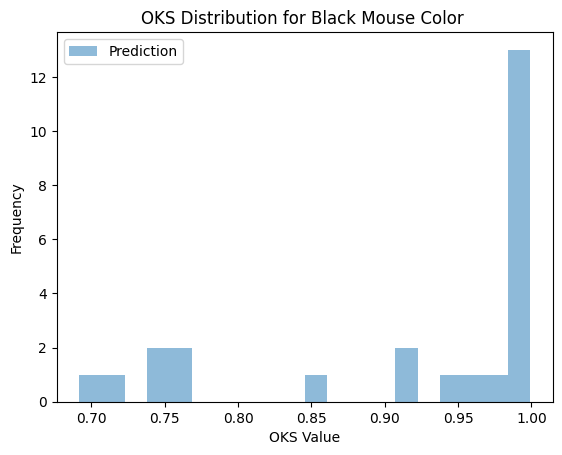

/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25WhiteDepthDLC_resnet50_wbaJan24shuffle1_182000.h5


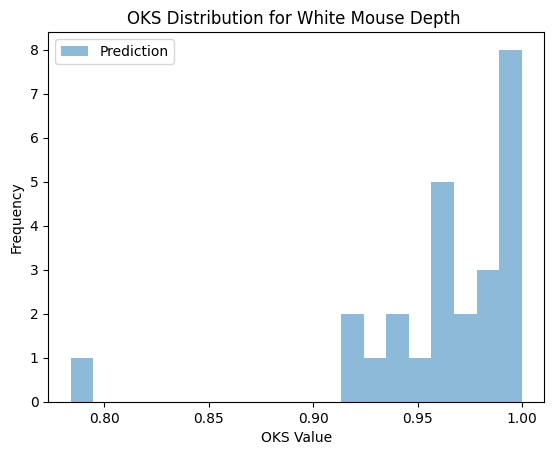

/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25AgoudiDepthDLC_resnet50_wbaJan24shuffle1_182000.h5


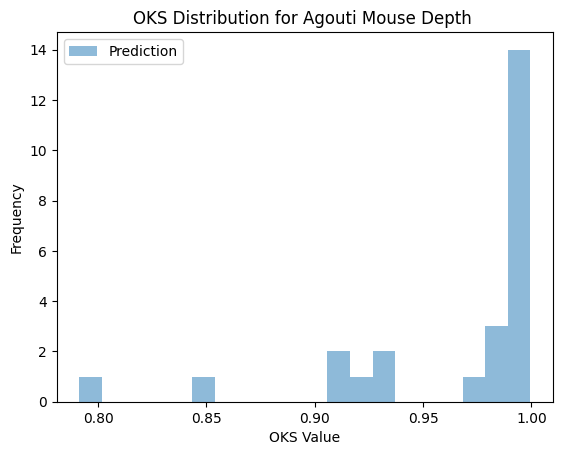

/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25WhiteColorDLC_resnet50_wbargbJan25shuffle1_182000.h5


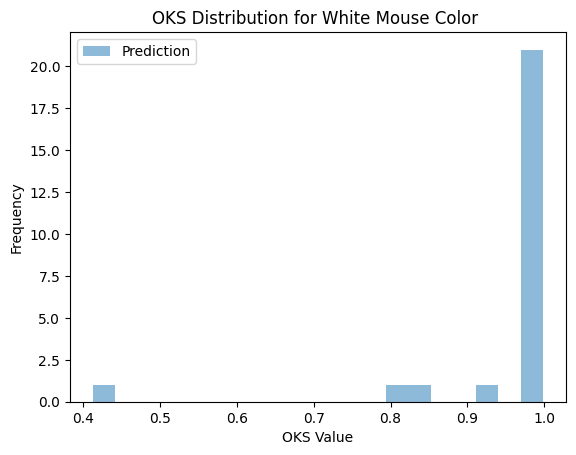

/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25BlackDepthDLC_resnet50_wbaJan24shuffle1_182000.h5


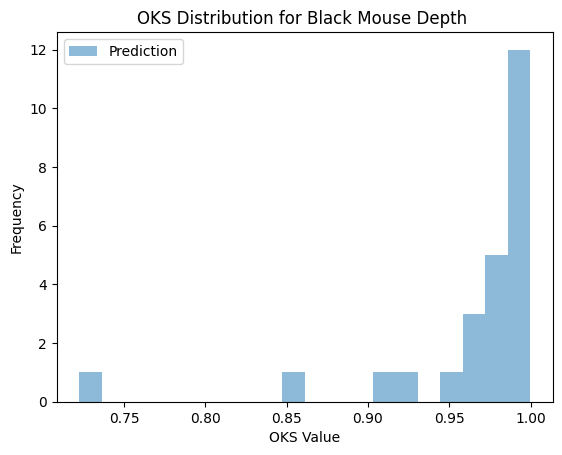

/home/noahc19/Downloads/SCORHE_Training_Depth_1-27-23/25AgoudiColorDLC_resnet50_wbargbJan25shuffle1_182000.h5


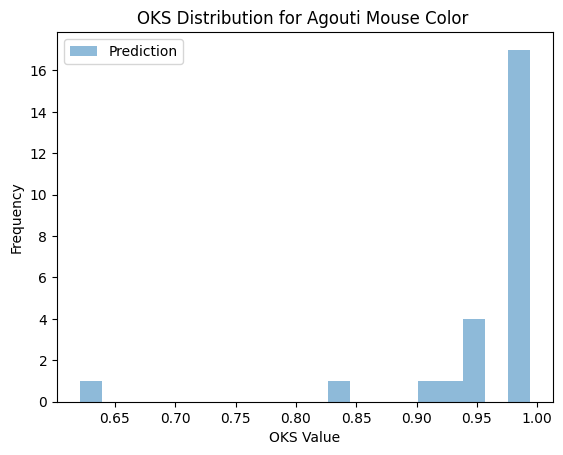

In [205]:
import matplotlib.pyplot as plt

# Plot a distruibution to show difference between oks values

cnt = 0
for key in oks_dict.keys():
    print(key)
    oks_vals = []
    for key2 in oks_dict[key].keys():
        oks_vals.append(oks_dict[key][key2])
    oks_vals_human = []
    for key3 in oks_dict_human.keys():
        oks_vals_human.append(oks_dict_human[key3])
    # make oks_vals_human and oks_vals the same length
    oks_vals_human = oks_vals_human[:len(oks_vals)]
    #print(oks_vals)
    #print(oks_vals_human)
    plt.hist(oks_vals, bins=20, alpha=0.5, label='Prediction')
    filebasenamees = key.split("/")[-1][:-3]     
    filebasename = "Depth " if "Depth" in filebasenamees else "Color "
    if "Black" in str(key):
        plt.title("OKS Distribution for Black Mouse " + filebasename)
    elif "White" in str(key):
        plt.title("OKS Distribution for White Mouse " + filebasename)
    elif "Agoudi" in str(key):
        plt.title("OKS Distribution for Agouti Mouse " + filebasename)

    plt.xlabel("OKS Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    # save plot as png
    plt.savefig(filebasenamees + "_oks_hist.jpg")
    plt.show()





